# Step 3: Exploratory Data Analysis
In this notebook, we read in our dataset with American Community Survey (ACS) estimate data and Child Opportunity Index (COI) target to conduct exploratory data analysis.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json, traceback
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.display import display
print('Program run at', dt.now())

Program run at 2021-06-23 07:47:49.517832


In [2]:
#read in data
est = pd.read_csv('s3://bleeding-hearts/workingdata/est_overall.csv')
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 121 entries, Unnamed: 0 to Child Opportunity Levels, overall COI, nationally-normed
dtypes: float64(118), int64(2), object(1)
memory usage: 16.8+ MB


## Descriptive Statistics

In [3]:
est.describe()

,Unnamed: 0,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Females 16 years and over_In labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder under 6 years_All parents in family in labor force,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years_All parents in family in labor force,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,COMMUTING TO WORK_Mean travel time to work (minutes),OCCUPATION_Civilian employed population 16 years and over,"OCCUPATION_Civilian employed population 16 years and over_Management, business, science, and arts occupations",OCCUPATION_Civilian employed population 16 years and over_Service occupations,OCCUPATION_Civilian employed population 16 years and over_Sales and office occupations,"OCCUPATION_Civilian employed population 16 years and over_Natural resources, construction, and maintenance occupations","OCCUPATION_Civilian employed population 16 years and over_Production, transportation, and material moving occupations",INDUSTRY_Civilian employed population 16 years and over,"INDUSTRY_Civilian employed population 16 years and over_Agriculture, forestry, fishing and hunting, and mining",INDUSTRY_Civilian employed population 16 years and over_Construction,INDUSTRY_Civilian employed population 16 years and over_Manufacturing,INDUSTRY_Civilian employed population 16 years and over_Wholesale trade,INDUSTRY_Civilian employed population 16 years and over_Retail trade,"INDUSTRY_Civilian employed population 16 years and over_Transportation and warehousing, and utilities",INDUSTRY_Civilian employed population 16 years and over_Information,"INDUSTRY_Civilian employed population 16 years and over_Finance and insurance, and real estate and rental and leasing","INDUSTRY_Civilian employed population 16 years and over_Professional, scientific, and management, and administrative and waste management services","INDUSTRY_Civilian employed population 16 years and over_Educational services, and health care and social assistance","INDUSTRY_Civilian employed population 16 years and over_Arts, entertainment, and recreation, and accommodation and food services","INDUSTRY_Civilian employed population 16 years and over_Other services, except public administration",INDUSTRY_Civilian employed population 16 years and over_Public administration,CLASS OF WORKER_Civilian employed population 16 years and over,CLASS OF WORKER_Civilian employed population 16 years and over_Private wage and salary workers,CLASS OF WORKER_Civilian employed population 16 years and over_Government workers,CLASS OF WORKER_Civilian employed population 16 years and over_Self-employed in own not incorporated business workers,CLASS OF WORKER_Civilian employed population 16 years and over_Unpa

## Target Variable
The target variable in the dataset is the COI Child Opportunity Level, Overall COI, nationally-normed. It has five classes, ranging from very low to very high. The following outputs provide information about the target variable. 

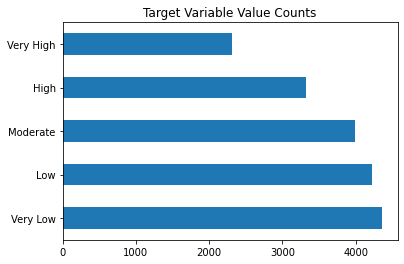

In [10]:
#information on the target variable
#est['Child Opportunity Levels, overall COI, nationally-normed'].value_counts(normalize=True)
est['Child Opportunity Levels, overall COI, nationally-normed'].value_counts().plot.barh(title='Target Variable Value Counts')
plt.show()

## Family Median Income
Our feature importance work shows that the Family Median Income is the most predictive feature in the dataset. The following outputs show the mean and median family income at each of the Child Opportunity Levels.

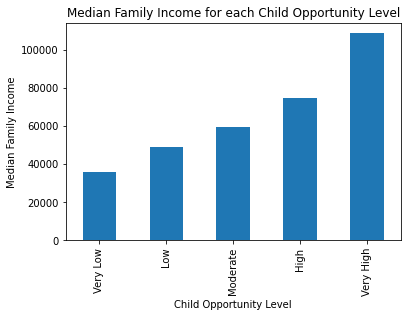

In [18]:
est.groupby('Child Opportunity Levels, overall COI, nationally-normed')['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars)'].median().reindex(['Very Low','Low','Moderate','High','Very High']).plot(kind='bar',title='Median Family Income for each Child Opportunity Level').set(xlabel='Child Opportunity Level',
         ylabel='Median Family Income')
plt.show()

### Family Median Income Boxplot

/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


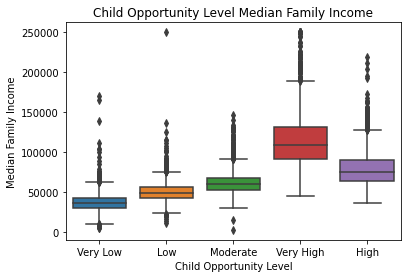

In [23]:
sns.boxplot(est['Child Opportunity Levels, overall COI, nationally-normed'], est['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars)']).set(
    xlabel='Child Opportunity Level', 
    ylabel='Median Family Income',
    title='Child Opportunity Level Median Family Income')
plt.show()

## Income & Benefits with Food Stamps Benefits in the Last 12 Months
The variable Income & Benefits with Food Stamps in the Last 12 Months was nearly as important as median household income. We ran the same analyses as above for this field as well.

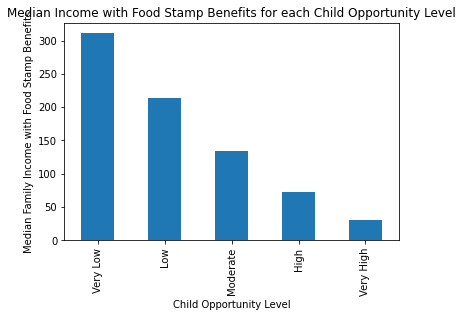

In [28]:
est.groupby('Child Opportunity Levels, overall COI, nationally-normed')['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With Food Stamp/SNAP benefits in the past 12 months'].median().reindex(['Very Low','Low','Moderate','High','Very High']).plot(kind='bar',title='Median Income with Food Stamp Benefits for each Child Opportunity Level').set(xlabel='Child Opportunity Level',
         ylabel='Median Family Income with Food Stamp Benefits')
plt.show()

/Users/sarahmartin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


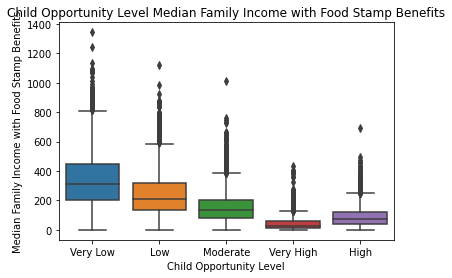

In [30]:
sns.boxplot(est['Child Opportunity Levels, overall COI, nationally-normed'], est['INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)_With Food Stamp/SNAP benefits in the past 12 months']).set(
    xlabel='Child Opportunity Level', 
    ylabel='Median Family Income with Food Stamp Benefits',
    title='Child Opportunity Level Median Family Income with Food Stamp Benefits')
plt.show()